## Project Instructions

This project is part of the DataCamp Data Analyst in Python career path. Explore the `Crime_2020_2023.csv` dataset, which is a stratified sample from 2020 to 2023. This sample was generated in the [sample.ipynb](./sample.ipynb) notebook. The DataCamp portion of the project focuses on answering the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.

- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.

- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.


In addition to the DataCamp tasks, I performed further analysis to add additional insights and value to the project. 


<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
        <img src="../images/la_skyline.jpg" alt="Imagen de LA" style="max-width: 100%; height: auto;">
    </div>
    <div style="flex: 2;">
        <strong>LA Crimes</strong>
        <br><br>
        Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 
        <br><br>
        Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!
        <br><br>
        You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.
    </div>
</div>


In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [254]:
crimes = pd.read_csv("../data/raw/Crime_2020_2023.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": int})

# Exploratory Data

In [255]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,year,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc
0,200215791,2020-10-04,2020-10-04,2020,1700,Rampart,THEFT PLAIN - PETTY ($950 & UNDER),80,M,W,NaN,Invest Cont
1,201421312,2020-12-05,2020-12-05,2020,300,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,X,X,NaN,Invest Cont
2,201412295,2020-06-14,2020-06-14,2020,1700,Pacific,ROBBERY,44,M,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont
3,201505312,2020-01-28,2020-01-27,2020,1830,N Hollywood,VEHICLE - STOLEN,0,NaN,NaN,NaN,Invest Cont
4,201220715,2020-09-15,2020-09-13,2020,1240,77th Street,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",0,X,X,NaN,Adult Other


In [256]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292238 entries, 0 to 292237
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         292238 non-null  int64         
 1   Date Rptd     292238 non-null  datetime64[ns]
 2   DATE OCC      292238 non-null  datetime64[ns]
 3   year          292238 non-null  int64         
 4   TIME OCC      292238 non-null  int64         
 5   AREA NAME     292238 non-null  object        
 6   Crm Cd Desc   292238 non-null  object        
 7   Vict Age      292238 non-null  int64         
 8   Vict Sex      253988 non-null  object        
 9   Vict Descent  253983 non-null  object        
 10  Weapon Desc   100878 non-null  object        
 11  Status Desc   292238 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 26.8+ MB


In [257]:
display(crimes.describe())

,DR_NO,Date Rptd,DATE OCC,year,TIME OCC,Vict Age
count,292238,292238,292238,292238,292238,292238
mean,217160377,2022-02-07 12:27:10.210992896,2022-01-26 01:52:24.650593280,2022,1336,30
min,2315,2020-01-01 00:00:00,2020-01-01 00:00:00,2020,1,-4
25%,210311017,2021-02-19 00:00:00,2021-02-06 00:00:00,2021,900,4
50%,220316684,2022-03-03 00:00:00,2022-02-17 00:00:00,2022,1415,31
75%,230211423,2023-02-02 00:00:00,2023-01-20 00:00:00,2023,1900,45
max,242111352,2024-08-28 00:00:00,2023-12-31 00:00:00,2023,2359,120
std,11240372,NaN,NaN,1,653,22


In [258]:
print(crimes['DR_NO'].nunique() == len(crimes))

True


# Data Cleaning & Preprocessing
- Review the unique values and distribution in each categorical column to understand the data and identify any inconsistencies or anomalies.
- Handle missing values (imputation or removal).
- Remove duplicates if present.
- Standardize categorical variables if necessary (e.g., 'Vict Sex', 'Vict Descent').

### Victim's descent

In [259]:
# Check Vict Descent values
print(crimes['Vict Descent'].unique())

['W' 'X' 'H' nan 'B' 'O' 'A' 'K' 'F' 'P' 'C' 'S' 'I' 'J' 'L' 'Z' 'V' 'U'
 'G' 'D' '-']


In [260]:
# Transform null values
crimes['Vict Descent'] = crimes['Vict Descent'].fillna('X')
crimes['Vict Descent'] = crimes['Vict Descent'].transform(lambda x: 'X' if x== '-' else x)
print(np.sort(crimes['Vict Descent'].unique()))

['A' 'B' 'C' 'D' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'O' 'P' 'S' 'U' 'V' 'W' 'X'
 'Z']


### Victim's Sex 
F: Female, M: Male, X: Unknown.

In [261]:
# Check Vict Sex values
print(crimes['Vict Sex'].unique())

['M' 'X' nan 'F' 'H']


In [262]:
# Transform null and remove unexpected
crimes['Vict Sex'] = crimes['Vict Sex'].fillna('X')
crimes = crimes[crimes['Vict Sex'] != 'H']
print(crimes['Vict Sex'].unique())

['M' 'X' 'F']


### Area name

In [263]:
# Check AREA NAME values
crimes['AREA NAME'].unique()

array(['Rampart', 'Pacific', 'N Hollywood', '77th Street', 'Central',
       'Mission', 'Devonshire', 'Southwest', 'Olympic', 'Hollywood',
       'Hollenbeck', 'West Valley', 'Northeast', 'Van Nuys', 'Wilshire',
       'Foothill', 'Newton', 'Southeast', 'Topanga', 'Harbor', 'West LA'],
      dtype=object)

### Victim Age

count   292198
mean        30
std         22
min         -4
25%          4
50%         31
75%         45
max        120
Name: Vict Age, dtype: float64


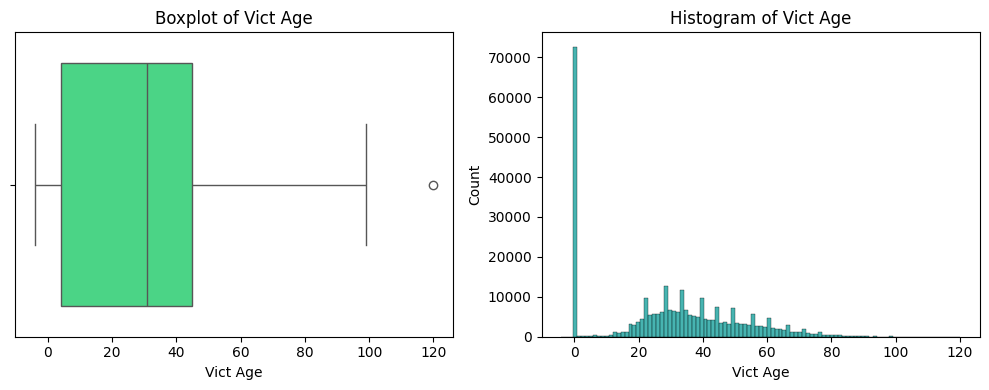

In [264]:
# Check Victim Age values
print(crimes['Vict Age'].describe())

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First plot: Boxplot
sns.boxplot(data=crimes, x='Vict Age', ax=axes[0],color='#34eb83')
axes[0].set_title('Boxplot of Vict Age')

# Second plot: Histogram
sns.histplot(data=crimes, x='Vict Age', ax=axes[1],color='#099B97')
axes[1].set_title('Histogram of Vict Age')

# Adjust spacing between plots
plt.tight_layout()

# Display the figure
plt.show()


In [265]:
# Remove nonsense Vict Age
crimes = crimes[(crimes['Vict Age'] > 1) & (crimes['Vict Age'] < 100)]

In [266]:
# Remove outliers

# Calculate the first and third quartiles for the 'Vict Age' column
q1 = crimes['Vict Age'].quantile(0.25)
q3 = crimes['Vict Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the bounds for non-outlier values
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers
crimes_cleaned = crimes[(crimes['Vict Age'] >= lower_bound) & (crimes['Vict Age'] <= upper_bound)]

# Check the cleaned Age
print(crimes_cleaned['Vict Age'].describe())


count   218248
mean        39
std         15
min          2
25%         28
50%         37
75%         50
max         83
Name: Vict Age, dtype: float64


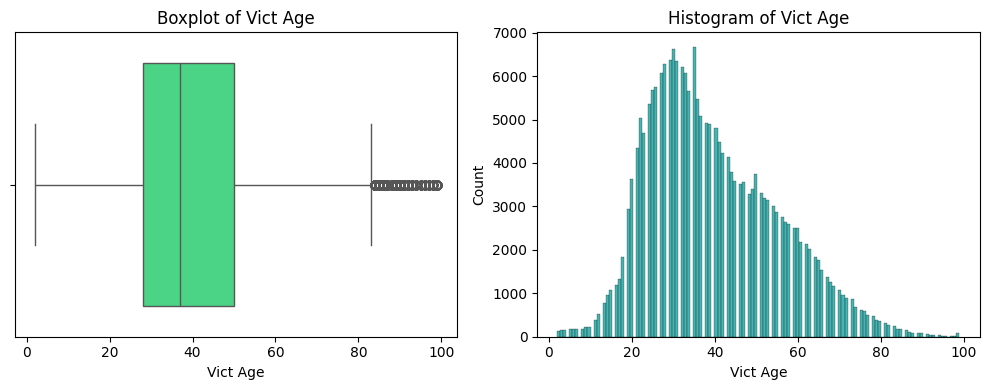

In [267]:
# Check cleaned Age

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First plot: Boxplot
sns.boxplot(data=crimes, x='Vict Age', ax=axes[0],color='#34eb83')
axes[0].set_title('Boxplot of Vict Age')

# Second plot: Histogram
sns.histplot(data=crimes, x='Vict Age', ax=axes[1],color='#099B97')
axes[1].set_title('Histogram of Vict Age')

# Adjust spacing between plots
plt.tight_layout()

# Display the figure
plt.show()

### Crime status

In [268]:
# Check crime status values
crimes['Status Desc'].unique()

array(['Invest Cont', 'Adult Arrest', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

### Remove duplicates

In [269]:
crimes = crimes.drop_duplicates()
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219520 entries, 0 to 292237
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         219520 non-null  int64         
 1   Date Rptd     219520 non-null  datetime64[ns]
 2   DATE OCC      219520 non-null  datetime64[ns]
 3   year          219520 non-null  int64         
 4   TIME OCC      219520 non-null  int64         
 5   AREA NAME     219520 non-null  object        
 6   Crm Cd Desc   219520 non-null  object        
 7   Vict Age      219520 non-null  int64         
 8   Vict Sex      219520 non-null  object        
 9   Vict Descent  219520 non-null  object        
 10  Weapon Desc   92839 non-null   object        
 11  Status Desc   219520 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 21.8+ MB


# Exploratory Data Analysis (EDA)


### General Overview
- **Crime Trends Over Time:**
  - Analyze the number of crimes over time (monthly, yearly).
  - Identify any seasonal patterns or trends.
  
- **Crime Frequency by Area:**
  - Which areas have the highest/lowest overall crime rates?
  - Visualize crime density by geographical area (e.g., heatmaps).


### Crimes trends over time

In [270]:
crimes['month'] = crimes['DATE OCC'].dt.month

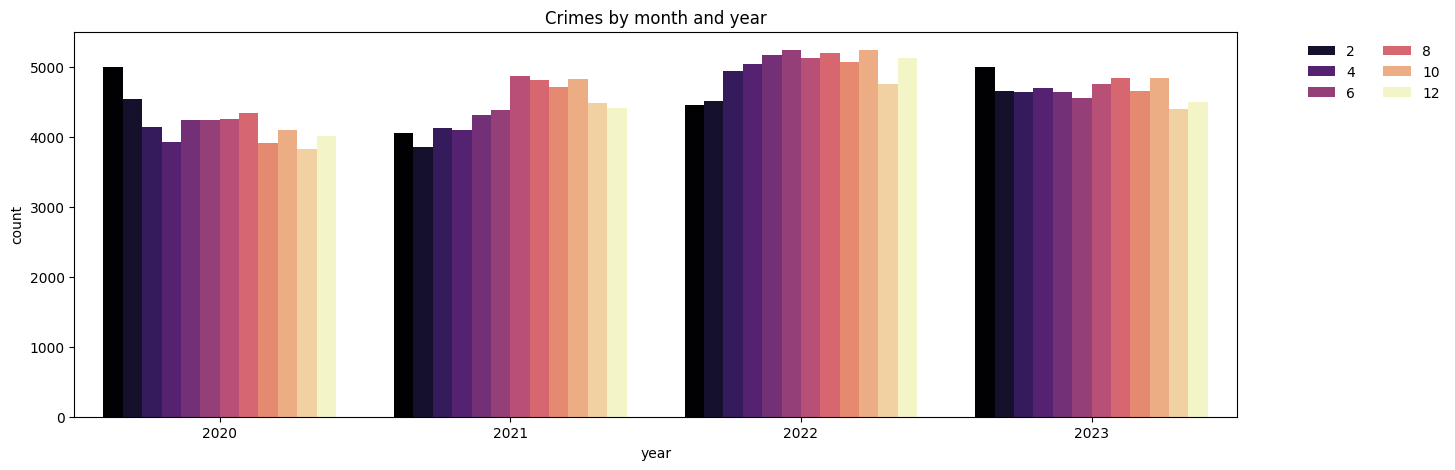

In [271]:

count_by_year = crimes[['year','month']].value_counts().reset_index(name='count').sort_values(by=['year','month'],ascending=[True,True])

plt.figure(figsize=(15, 5))
sns.barplot(data=count_by_year,x='year',y='count',hue='month', palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False,ncol=2)
plt.title('Crimes by month and year')
plt.show()

### Crimes frequency by area

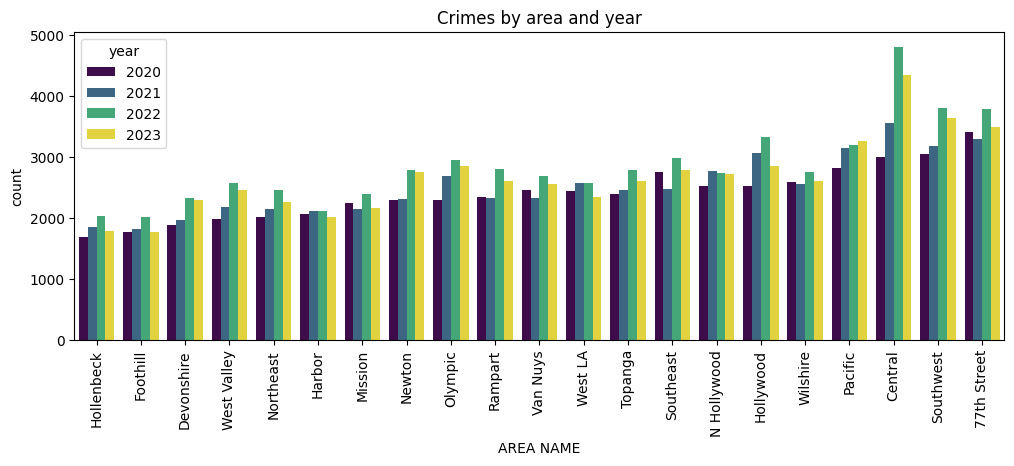

In [272]:
count_by_area = crimes[['AREA NAME','year']].value_counts().sort_values().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(data=count_by_area,x='AREA NAME',y='count', hue='year', palette='viridis')
plt.xticks(rotation=90)
plt.title("Crimes by area and year")
plt.show()


### Crimes by area and date

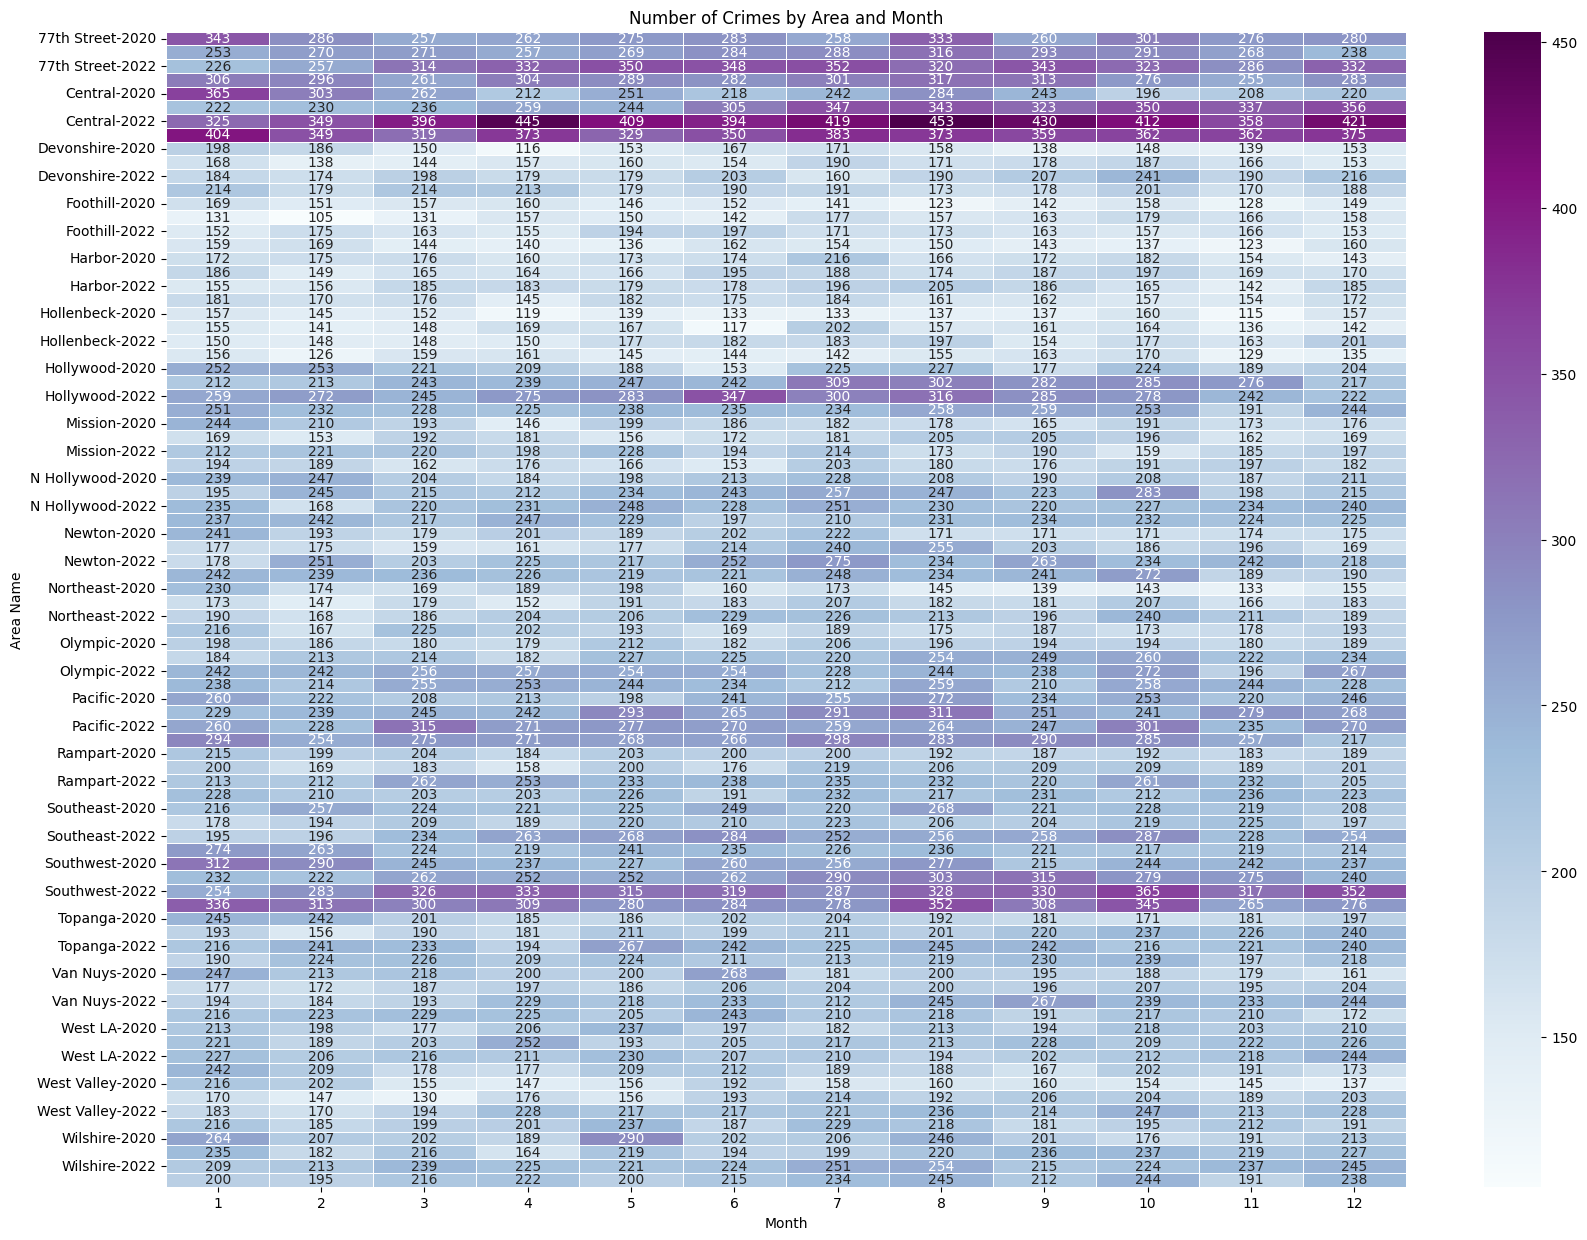

In [273]:
heatmap_data = crimes.groupby(['AREA NAME', 'year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, cmap="BuPu", annot=True, fmt="d", linewidths=0.5)
plt.title('Number of Crimes by Area and Month')
plt.xlabel('Month')
plt.ylabel('Area Name')
plt.show()


### Victim Demographics
  - Distribution of crimes by age group.
  - Explore if certain crimes are more frequent for specific age groups.
  - Analyze the distribution of crimes by gender.
  - Identify which descent categories are more affected.
  - Type of crime by Area.


### Distribution of crimes by age group

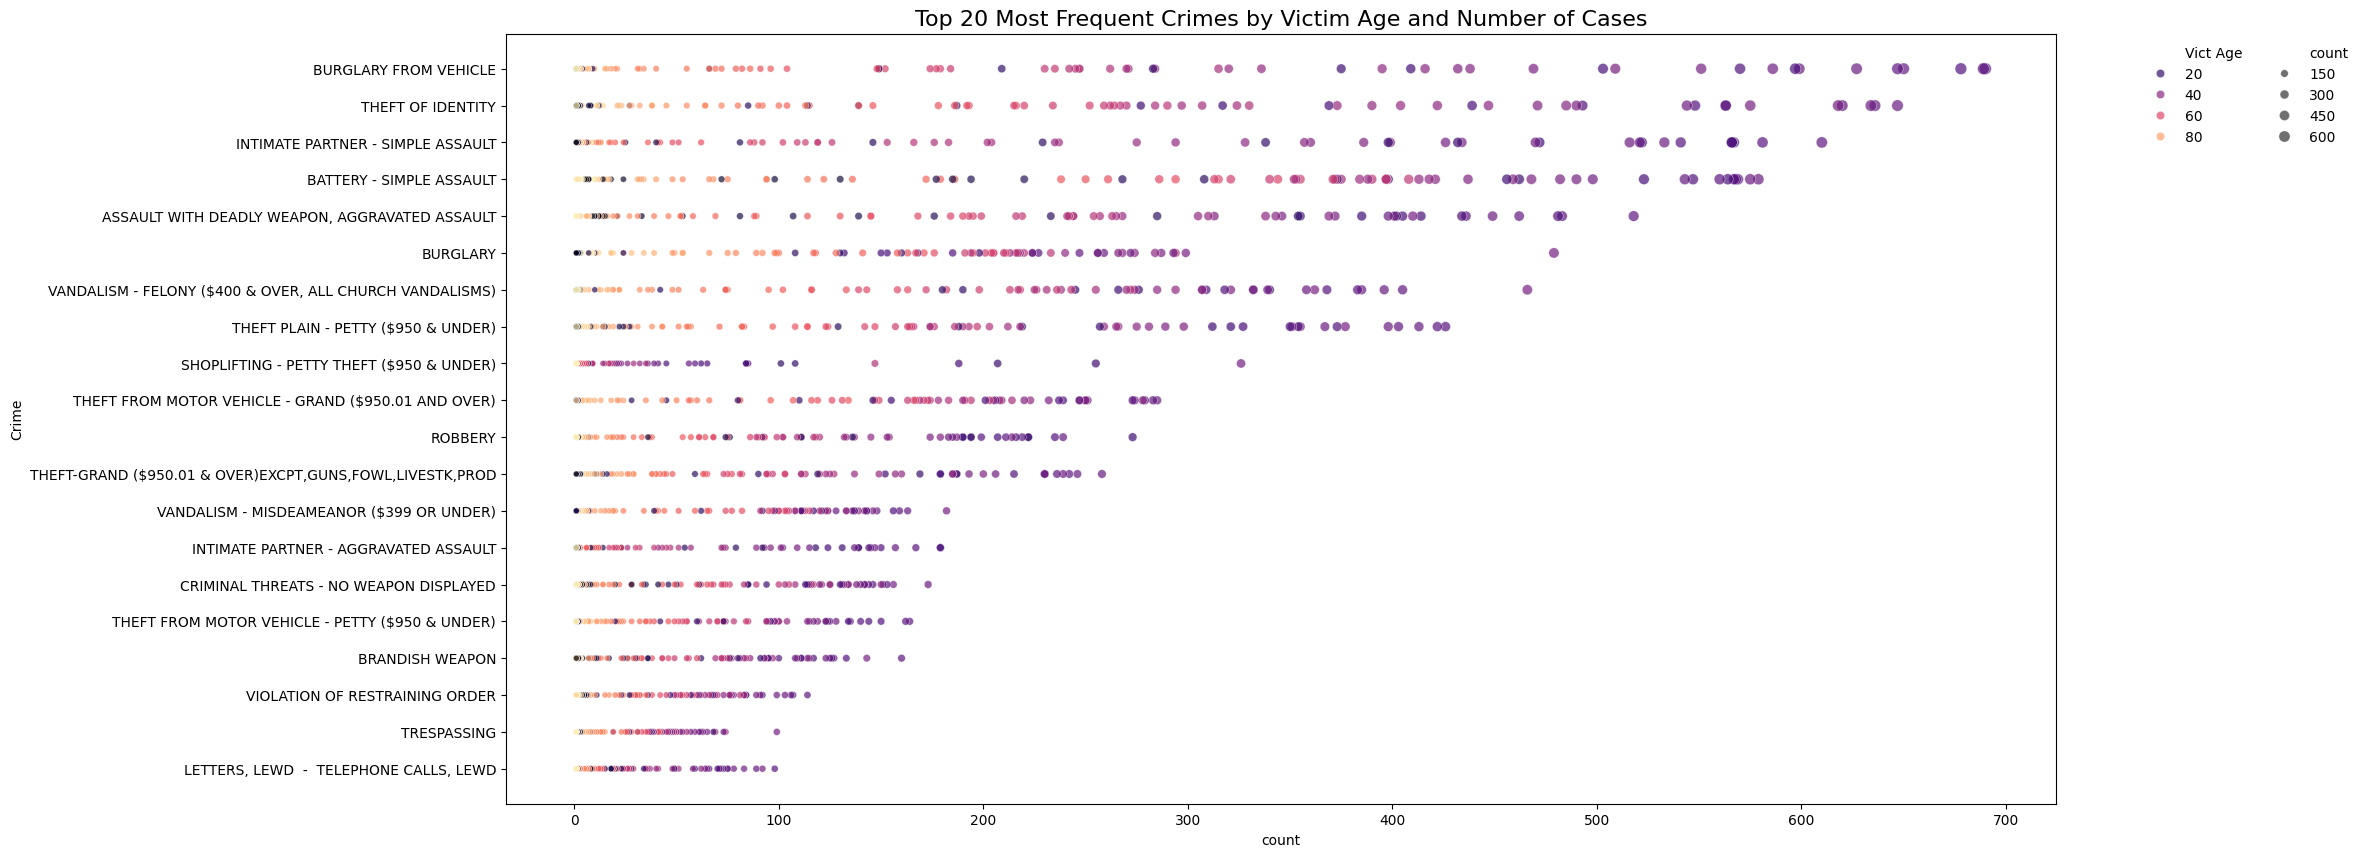

In [274]:
# Adjust figure size
plt.figure(figsize=(20, 10))

# Get the most common crimes and their counts
most_common_crimes = crimes[['Vict Age', 'Crm Cd Desc']].value_counts().sort_values(ascending=False).reset_index()
most_common_crimes.columns = ['Vict Age', 'Crime', 'count']  # Rename the count column

# Filter only the top 15 most common crimes
top_20_crimes = most_common_crimes.groupby('Crime').sum().nlargest(20, 'count').reset_index()
top_20_crimes = most_common_crimes[most_common_crimes['Crime'].isin(top_20_crimes['Crime'])]

# Plot the top 20 most common crimes
sns.scatterplot(x='count', y='Crime', data=top_20_crimes, hue='Vict Age', palette='magma', size='count', alpha=0.7)

plt.title("Top 20 Most Frequent Crimes by Victim Age and Number of Cases", fontsize=16)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False, ncol=2)

# Show plot
plt.show()


### Distribution of crimes by gender

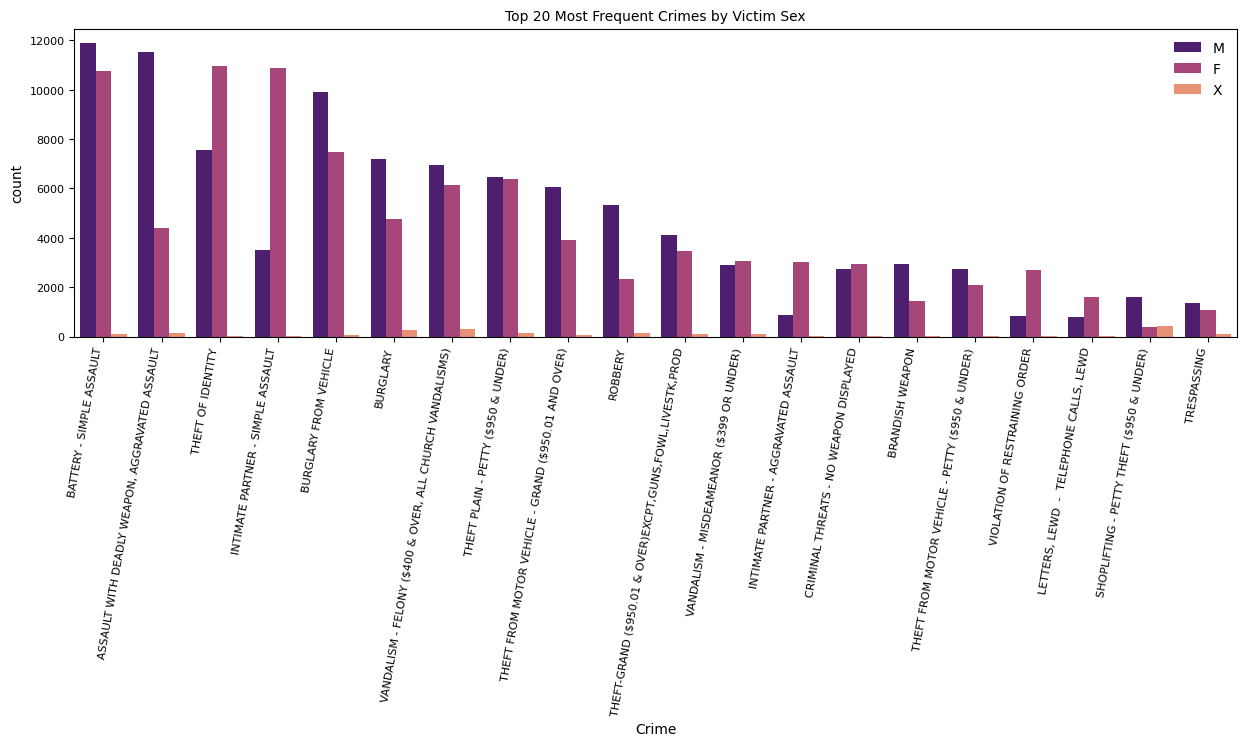

In [275]:
# Adjust figure size
plt.figure(figsize=(15, 4))

# Get the most common crimes and their counts
most_common_crimes = crimes[['Crm Cd Desc','Vict Sex']].value_counts().sort_values(ascending=False).reset_index()
most_common_crimes.columns = ['Crime','Vict Sex', 'count']  # Rename the count column

# Filter only the top 15 most common crimes
top_20_crimes = most_common_crimes.groupby('Crime').sum().nlargest(20, 'count').reset_index()

top_20_crimes = most_common_crimes[most_common_crimes['Crime'].isin(top_20_crimes['Crime'])]
sns.barplot(data=top_20_crimes,x='Crime',y='count',hue='Vict Sex',palette='magma')


plt.title("Top 20 Most Frequent Crimes by Victim Sex", fontsize=10)

# visual configuration
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False, ncol=1)

plt.xticks(rotation=80, ha='right', fontsize=8)
plt.tick_params(axis='x', labelsize=8)  
plt.tick_params(axis='y', labelsize=8) 

# Show plot
plt.show()


In [276]:
desc_mapping = {
    'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian' 
}


### Identify which descent categories are more affected

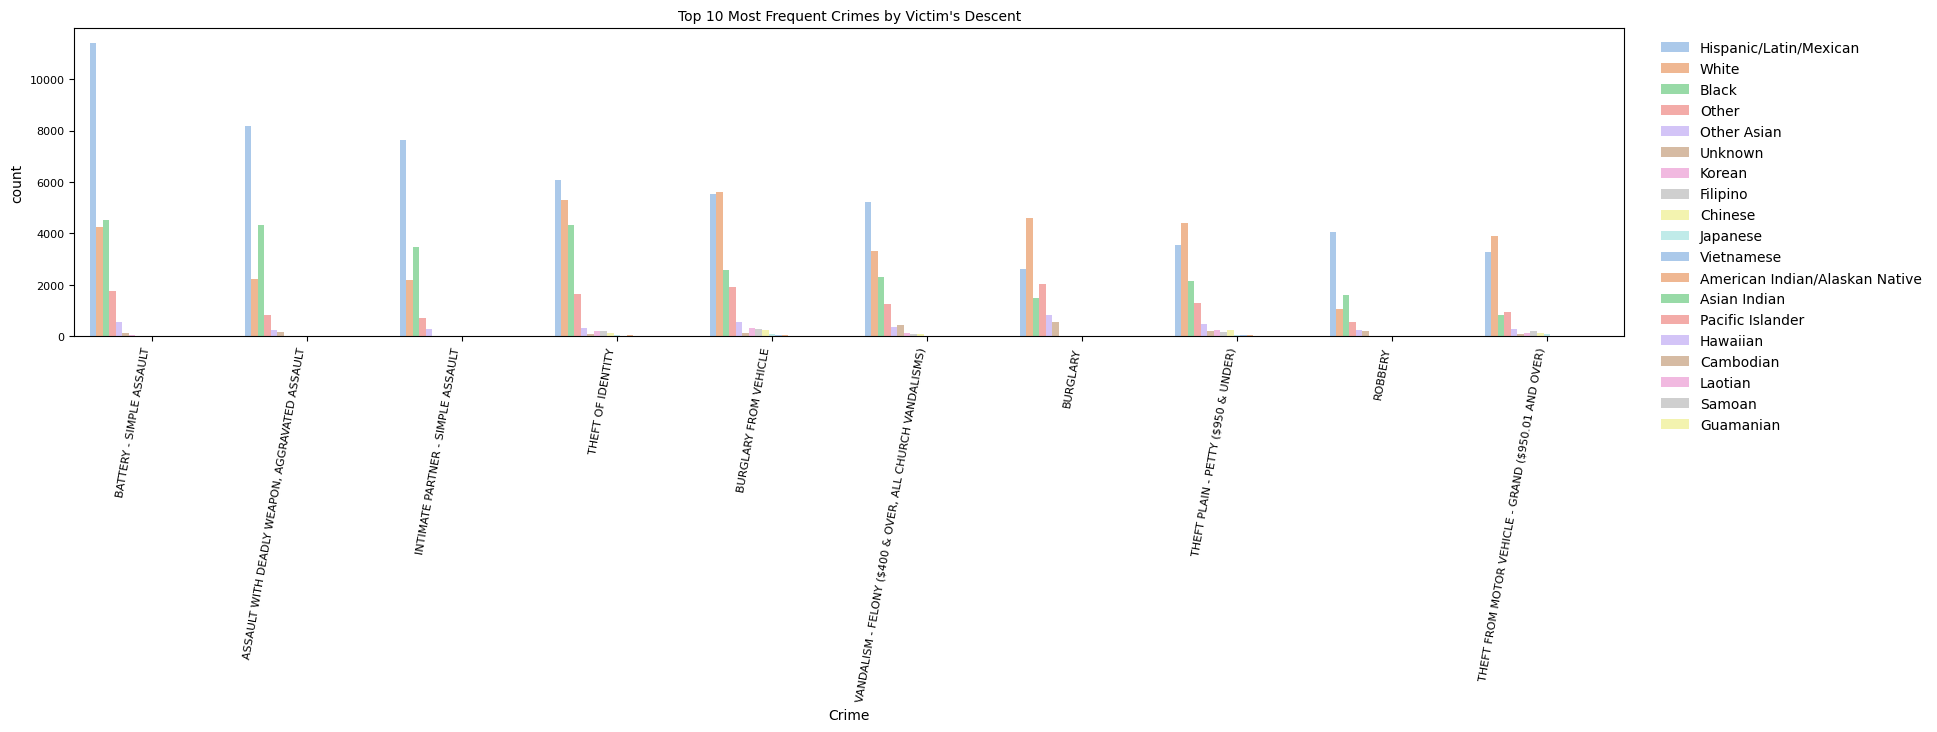

In [277]:
# Adjust figure size
plt.figure(figsize=(20, 4))

# Get the most common crimes and their counts
most_common_crimes = crimes[['Crm Cd Desc','Vict Descent']].value_counts().sort_values(ascending=False).reset_index()
most_common_crimes.columns = ['Crime','Vict Descent', 'count'] 

# Filter only the top 15 most common crimes
top_10_crimes = most_common_crimes.groupby('Crime').sum().nlargest(10, 'count').reset_index()

top_10_crimes = most_common_crimes[most_common_crimes['Crime'].isin(top_10_crimes['Crime'])]
sns.barplot(data=top_10_crimes,x='Crime',y='count',hue='Vict Descent',palette='pastel')


plt.title("Top 10 Most Frequent Crimes by Victim's Descent", fontsize=10)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [desc_mapping[label] if label in desc_mapping else label for label in labels]
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False, ncol=1)


# visual configuration
plt.xticks(rotation=80, ha='right', fontsize=8)
plt.tick_params(axis='x', labelsize=8)  
plt.tick_params(axis='y', labelsize=8) 

# Show plot
plt.show()


###   Type of crime by Area

<Figure size 2000x1000 with 0 Axes>

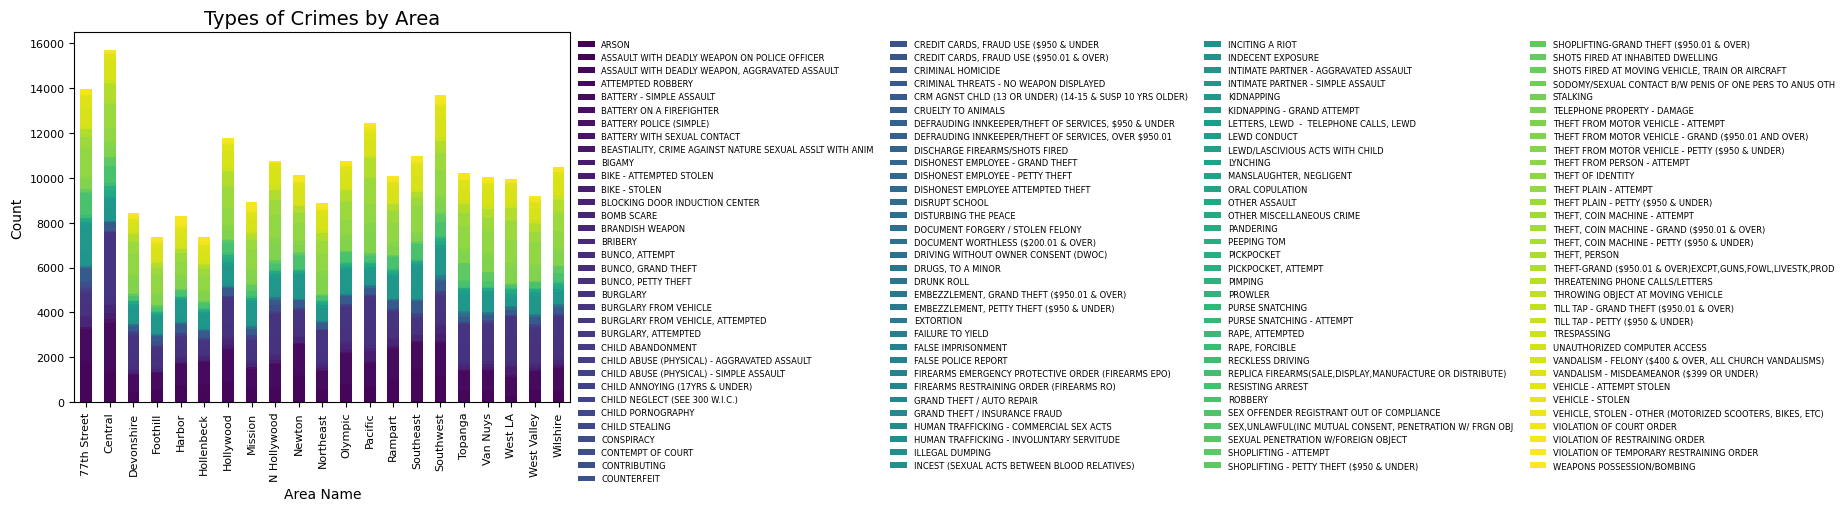

In [278]:
# Group by area and crime type, and count the number of incidents
crime_by_area = crimes.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='count')

# Create the figure and plot
plt.figure(figsize=(20, 10)) 

# Pivot the data for the stacked bar plot
stacked_data = crime_by_area.pivot_table(index='AREA NAME', columns='Crm Cd Desc', values='count', fill_value=0)

# Create the stacked bar chart with the 'viridis' colormap
ax = stacked_data.plot(kind='bar', stacked=True, colormap='viridis')

# Set plot titles and labels
plt.title('Types of Crimes by Area', fontsize=14)
plt.xlabel('Area Name', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Customize the x-axis and y-axis tick labels
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Add the legend with formatting
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, ncol=4, fontsize=6)

# Display the plot
plt.show()


### Crime Types and Weapon Usage

- **Weapon Analysis:**
  - Explore the most common weapons used in crimes.


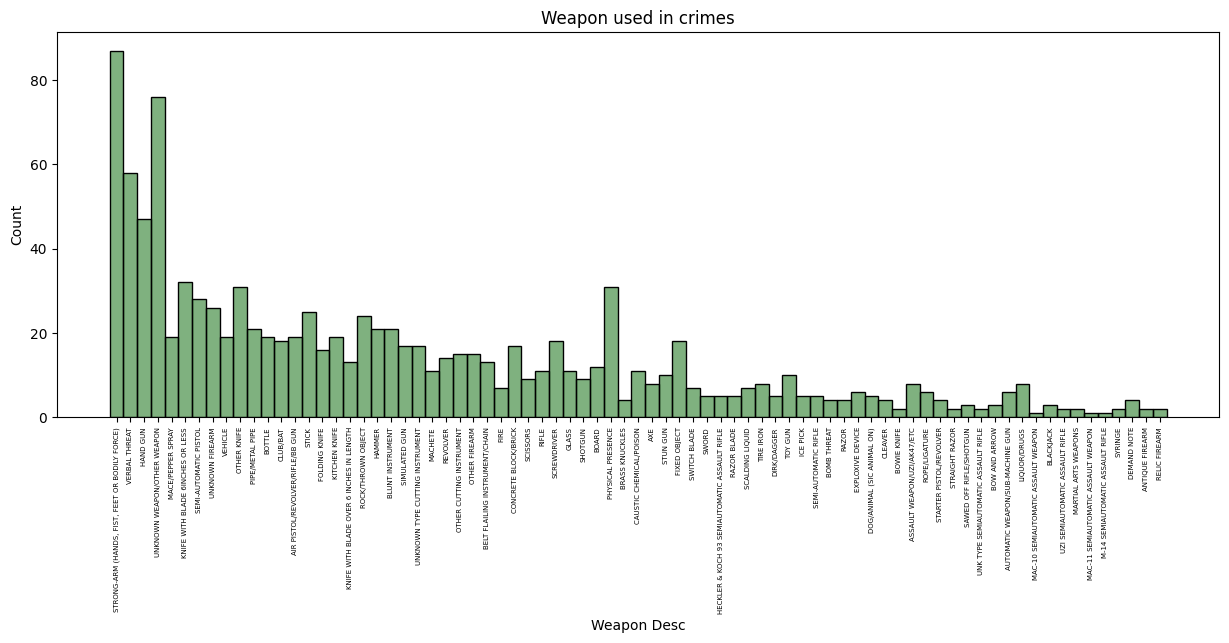

In [279]:
plt.figure(figsize=(15, 5))
weapon_by_crime = crimes.groupby(['Crm Cd Desc','Weapon Desc'],as_index=False).size().sort_values(by='size',ascending=False)
sns.histplot(data=weapon_by_crime,x='Weapon Desc',color='darkgreen',alpha=0.5)
plt.xticks(rotation=90, fontsize=5)
plt.title('Weapon used in crimes')
plt.show()

## Advanced Insights
- **Crime Hotspots (Time and Location):**
  - Identify the most dangerous times and places for specific crime types.



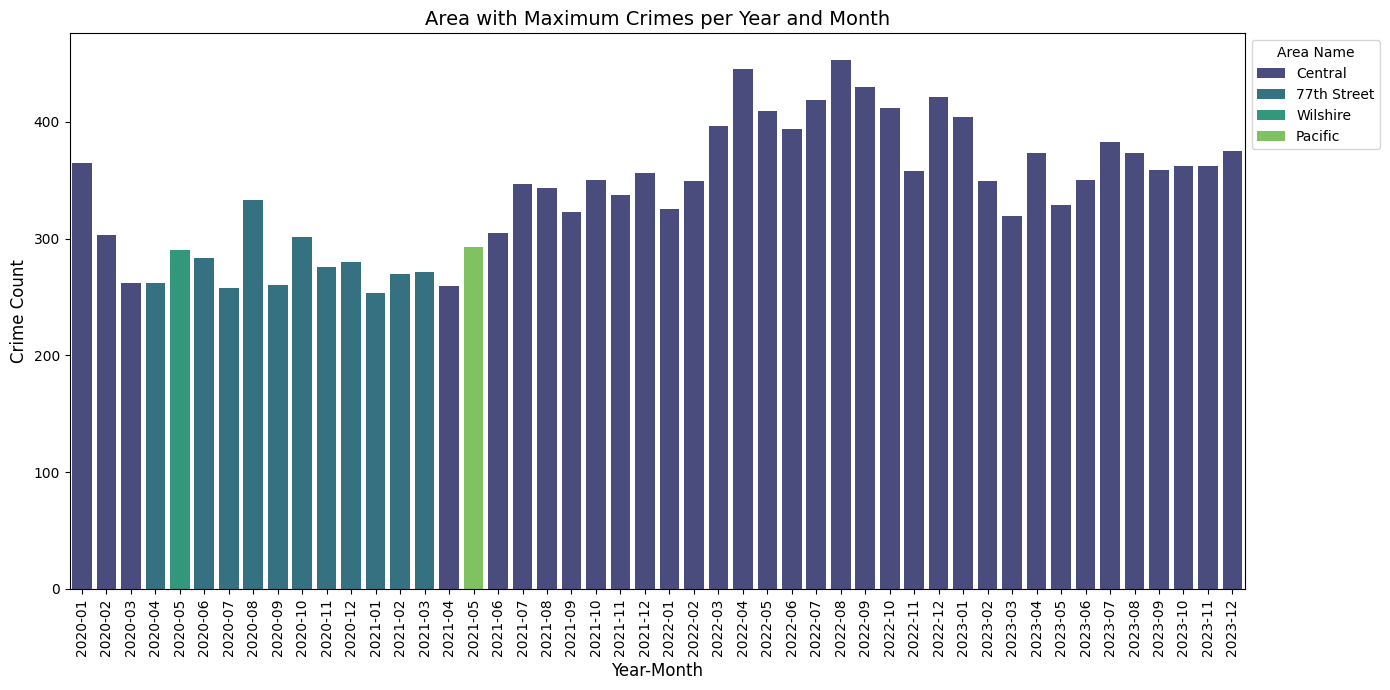

In [280]:
# Group by year, month, and area, and count the incidents
most_crimes_by_time_area = crimes.groupby(['year', 'month', 'AREA NAME']).size().reset_index(name='count')

# Get the area with the highest number of crimes for each year-month combination
max_crimes_by_time_area = most_crimes_by_time_area.loc[most_crimes_by_time_area.groupby(['year', 'month'])['count'].idxmax()].reset_index(drop=True)
max_crimes_by_time_area['Year-Month'] = max_crimes_by_time_area['year'].astype(str) + '-' + max_crimes_by_time_area['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 7))

# Create a barplot showing the area with the most crimes per year and month
sns.barplot(data=max_crimes_by_time_area, x='Year-Month', y='count', hue='AREA NAME', palette='viridis')

# Adjust labels and title
plt.title('Area with Maximum Crimes per Year and Month', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)

# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Area Name')

# Show the plot
plt.tight_layout()
plt.show()

# Datacamp project questions

### Which hour has the highest frequency of crimes? 
Store as an integer variable called peak_crime_hour

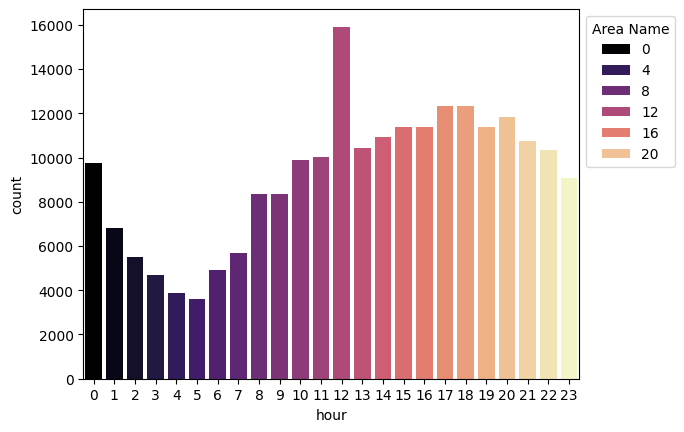

12


In [281]:
crimes['hour'] = crimes['TIME OCC'] // 100

sns.countplot(data=crimes, x='hour', hue='hour', palette='magma')
# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Area Name')

plt.show()
# The plot shows that the hour with the most records is at 12

# Get the number of records per hour
crimes_by_hours = crimes['hour'].value_counts()

# Get the maximum count
max_counts = crimes['hour'].value_counts().max()

# From the hours, get the one with the highest record
peak_crime_hour = crimes_by_hours[crimes_by_hours == max_counts].index[0]
peak_crime_hour = int(peak_crime_hour)
print(peak_crime_hour)


### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
Save as a string variable called peak_night_crime_location.

In [282]:
# Get all crimes between 10pm and 3:59am
crimes_noct = crimes[np.logical_and(crimes['TIME OCC'] >= 359, crimes['TIME OCC'] <= 2200)]

# Count the nocturnal crimes by area
# value_counts returns the counts sorted from highest to lowest
crimes_noct_by_areas = crimes_noct['AREA NAME'].value_counts()

# Get the top area with the most nocturnal crimes
peak_night_crime_location = crimes_noct_by_areas.index[0]
print(peak_night_crime_location)

Central


### Identify the number of crimes committed against victims of different age groups. 
Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [283]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["vict_ranges"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["vict_ranges"].value_counts()
print(victim_ages)

vict_ranges
26-34    55377
35-44    48463
45-54    33750
18-25    33499
55-64    23978
65+      16618
0-17      7835
Name: count, dtype: int64


In [284]:
victim_ages = victim_ages.reset_index()

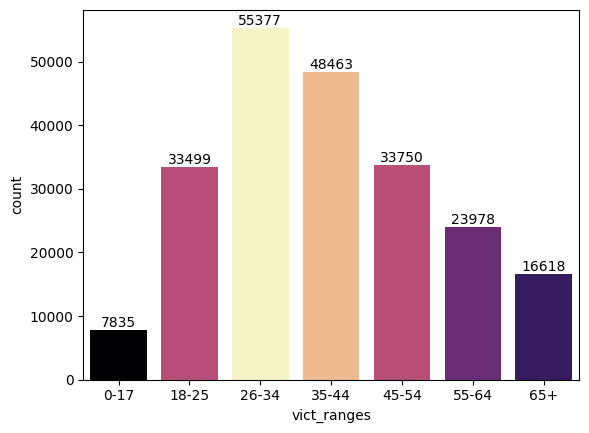

In [285]:
# Create a bar plot with the 'magma' palette and without the legend
colors = sns.color_palette('viridis', len(victim_ages))
ax = sns.barplot(data=victim_ages, x='vict_ranges', y='count', hue='count', palette='magma')

# Remove the legend
plt.legend([], [], frameon=False)

# Add the count values on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()